In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import fasttext
import fasttext.util
from IPython.display import clear_output

In [2]:
cars = pd.read_csv('divar_cars.csv', index_col=0)
cars = cars[['brand_en', 'city', 'image_count', 'mileage', 'price', 'year', 'title', 'desc']]
cars['brand'] = cars['brand_en'].replace('سایر', 'Others').replace('وانت', 'Pickup truck')
cars.drop(columns=['brand_en'], inplace=True)
print(cars.shape)
cars = cars.replace(-1, np.NaN).replace(False, 0)
cars.head()

(103799, 8)


city  image_count   mileage       price    year  \
18   Karaj            0  290000.0   8500000.0  1381.0   
22  Tehran            3  175000.0  19500000.0  1372.0   
36  Tehran            4   80000.0  23900000.0  1391.0   
38  Tehran            3  125000.0   8500000.0  1384.0   
39  Tehran            2   11000.0  18500000.0  1393.0   

                       title  \
18           پژو مدل 81 مشکی   
22                پاترول 2در   
36       سمند دوگانه کارخانه   
38              پژو405 مدل84   
39  ام وی ام 110 چهار سیلندر   

                                                 desc        brand  
18  پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...  Peugeot 405  
22  سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...       Nissan  
36  سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...       Samand  
38     بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم  Peugeot 405  
39  ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...          MVM

In [3]:
# categorizing price in brand
price_categories = ['low', 'medium', 'high']

cars['price_cat'] = ''
percents = [p*100/len(price_categories) for p in range(len(price_categories)+1)]

for brand in cars.brand.unique():
#     print(brand)
    borders = np.percentile(cars.loc[cars['brand']==brand, 'price'], percents)
#     print(borders)
    
    for icat in range(len(price_categories)):
        cars.loc[(cars['brand']==brand) & (cars['price'] >= borders[icat]) & (cars['price'] <= borders[icat+1]), 'price_cat'] = price_categories[icat]
#     cars.loc[cars['brand']==brand, 'price']
#     print(' *** ')

# cars.loc[cars['brand']=='Nissan', ['price', 'price_cat']]
print('All cars are now categorized into '+str(len(price_categories))+' different categories by their price with equal number of subcategories.')

All cars are now categorized into 3 different categories by their price with equal number of subcategories.


In [4]:
cars.head()

city  image_count   mileage       price    year  \
18   Karaj            0  290000.0   8500000.0  1381.0   
22  Tehran            3  175000.0  19500000.0  1372.0   
36  Tehran            4   80000.0  23900000.0  1391.0   
38  Tehran            3  125000.0   8500000.0  1384.0   
39  Tehran            2   11000.0  18500000.0  1393.0   

                       title  \
18           پژو مدل 81 مشکی   
22                پاترول 2در   
36       سمند دوگانه کارخانه   
38              پژو405 مدل84   
39  ام وی ام 110 چهار سیلندر   

                                                 desc        brand price_cat  
18  پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...  Peugeot 405       low  
22  سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...       Nissan    medium  
36  سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...       Samand      high  
38     بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم  Peugeot 405       low  
39  ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...          MVM    medium

In [5]:
cars['age'] = cars['year'].max() - cars['year']
cars.drop(columns=['year'], inplace=True)
cars.head()

city  image_count   mileage       price                     title  \
18   Karaj            0  290000.0   8500000.0           پژو مدل 81 مشکی   
22  Tehran            3  175000.0  19500000.0                پاترول 2در   
36  Tehran            4   80000.0  23900000.0       سمند دوگانه کارخانه   
38  Tehran            3  125000.0   8500000.0              پژو405 مدل84   
39  Tehran            2   11000.0  18500000.0  ام وی ام 110 چهار سیلندر   

                                                 desc        brand price_cat  \
18  پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...  Peugeot 405       low   
22  سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...       Nissan    medium   
36  سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...       Samand      high   
38     بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم  Peugeot 405       low   
39  ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...          MVM    medium   

     age  
18  14.0  
22  23.0  
36   4.0  
38  11.0  
39   2.0

In [6]:
''' convert price_cat column from possible str values to numbers starting from 0 '''
for icat in range(len(price_categories)):
    cars.loc[cars['price_cat']==price_categories[icat], 'price_cat'] = icat
cars = cars.astype({'price_cat': 'int32'})

In [7]:
for col in cars.columns.values:
    if (len(cars[col].value_counts()) <= 1):
        cars.drop(columns=[col], inplace=True)

## Pre-Process

In [8]:
cars.drop(columns=['price'], inplace=True)

In [9]:
cars.reset_index(inplace=True, drop=True)

##### Binarizing

In [10]:
cars = pd.get_dummies(cars, dummy_na=True, columns=['city', 'brand']).reset_index(drop=True)
print(cars.shape)
cars.head()

(103799, 41)


image_count   mileage                     title  \
0            0  290000.0           پژو مدل 81 مشکی   
1            3  175000.0                پاترول 2در   
2            4   80000.0       سمند دوگانه کارخانه   
3            3  125000.0              پژو405 مدل84   
4            2   11000.0  ام وی ام 110 چهار سیلندر   

                                                desc  price_cat   age  \
0  پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...          0  14.0   
1  سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...          1  23.0   
2  سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...          2   4.0   
3     بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم          0  11.0   
4  ام وی ام چهار سیلندر مدل 93 فنی سالم بدون رنگ ...          1   2.0   

   city_Ahvaz  city_Isfahan  city_Karaj  city_Kermanshah  ...  \
0           0             0           1                0  ...   
1           0             0           0                0  ...   
2           0             0           0                0  ...   
3           0             0           0                0  ...   
4           0             0           0                0  ...   

   brand_Pickup truck  brand_Pride  brand_RD/ROA  brand_Renault  brand_Runna  \
0                   0            0             0              0            0   
1                   0            0             0              0            0   
2                   0            0             0              0            0   
3                   0            0             0              0            0   
4                   0            0             0              0            0   

   brand_Samand  brand_Tiba  brand_Tondar 90  brand_Toyota  brand_nan  
0             0           0                0             0          0  
1             0           0                0             0          0  
2             1           0                0             0          0  
3             0           0                0             0          0  
4             0           0                0             0          0  

[5 rows x 41 columns]

##### Hazm Normalizer

In [17]:
from __future__ import unicode_literals
from hazm import *
lemmatizer = Lemmatizer()
normalizer = Normalizer()

for i, row in cars.iterrows():
    words = word_tokenize(normalizer.normalize(row['desc']))
    row['desc'] = ''
    for w in words:
        row['desc'] += w + ' ' # lemmatizer.lemmatize(w) + ' '
    cars.at[i, 'desc'] = row['desc']
    if (i % 100 == 0):
        clear_output(wait=True)
        print(i, '/', cars.shape[0])

clear_output(wait=True)
print('Hazm Normalizer Done')
cars

Hazm Normalizer Done


image_count   mileage  \
0                 0  290000.0   
1                 3  175000.0   
2                 4   80000.0   
3                 3  125000.0   
4                 2   11000.0   
...             ...       ...   
103794            1  120000.0   
103795            2  173000.0   
103796            3  140000.0   
103797            4  123000.0   
103798            3   43000.0   

                                                     desc  price_cat   age  \
0       پژو ۲۰۰۰ فنی تازه تعمیر بدنه بدون خطو خش تخیف ...          0  14.0   
1       سلام . ماشین کاملا سالم همه چی فابریک متور زد ...          1  23.0   
2       سمند ال ایکس بدون رنگ تمامی سرویس‌ها انجام شده...          2   4.0   
3         بیمه یکسال ده سال تخفیف دور رنگ شاسی پلمپ سالم           0  11.0   
4       ام وی ام چهار سیلندر مدل ۹۳ فنی سالم بدون رنگ ...          1   2.0   
...                                                   ...        ...   ...   
103794  پژو GLX تاکسی گردشی مدل ۱۳۹۰ بسیار کم کارکرد د...          2   5.0   
103795  فوق‌العاده سالم بدون رنگ دزدگیر ماجیکار شیشه‌ه...          1   5.0   
103796  مدل ۸۴ تمیز . بدون رنگ . سیستم صوتی . رینگ و ل...          1  11.0   
103797  سند۲ برگ ، بیمه تا برج$NUMتخفیفات بیمه ۱۵ سال ...          0  16.0   
103798  پراید دوگانه کارخانه میباشد و کم کارکرد . روکش...          2   2.0   

        city_Ahvaz  city_Isfahan  city_Karaj  city_Kermanshah  city_Mashhad  \
0                0             0           1                0             0   
1                0             0           0                0             0   
2                0             0           0                0             0   
3                0             0           0                0             0   
4                0             0           0                0             0   
...            ...           ...         ...              ...           ...   
103794           0             0           0                0             0   
103795           0             0           0                0             0   
103796           0             1           0                0             0   
103797           0             0           1                0             0   
103798           0             0           0                0             0   

        ...  title_00  title_01  title_02  title_03  title_04  title_05  \
0       ... -0.010695  0.437270 -0.537405 -0.061926  0.062474  0.147614   
1       ... -0.129813  0.026223  0.115694  0.312590 -0.160347  0.311918   
2       ... -0.406387  0.336248 -0.273393 -0.222274  0.048706  0.068922   
3       ... -0.024639  0.295503 -0.650070 -0.345186  0.000371  0.036682   
4       ...  0.152030  0.063091 -0.005781 -0.107271  0.157839  0.096303   
...     ...       ...       ...       ...       ...       ...       ...   
103794  ...  0.126972  0.162808 -0.538515  0.127538  0.088273 -0.052792   
103795  ...  0.693565  0.154097 -0.173821 -0.006092  0.192001  0.431174   
103796  ... -0.274693  0.372161 -0.381128 -0.052519 -0.057549  0.218421   
103797  ... -0.280384  0.323329 -0.279608 -0.127260 -0.005318  0.049288   
103798  ... -0.361091  0.326785 -0.329073 -0.345374  0.027669  0.068648   

        title_06  title_07  title_08  title_09  
0      -0.180093  0.250877  0.041632  0.451212  
1      -0.250631  0.413870  0.011728  0.299772  
2      -0.233750 -0.040800 -0.125126  0.559790  
3      -0.104147  0.150219 -0.156013  0.501015  
4      -0.142173  0.005980  0.020219  0.229020  
...          ...       ...       ...       ...  
103794 -0.146387  0.299238 -0.036036  0.403699  
103795 -0.067191 -0.312637 -0.091340  0.151242  
103796 -0.184162  0.026087 -0.086070  0.381133  
103797 -0.147951  0.238193 -0.171083  0.249587  
103798 -0.203845 -0.162427 -0.089651  0.478612  

[103799 rows x 50 columns]

## Train Unsupervised fastText

In [11]:
cars[['desc']].to_csv('divar_cars_fasttext_unsupervised.txt', sep='\t', index = False, header = False)

In [12]:
model = fasttext.train_unsupervised('divar_cars_fasttext_unsupervised.txt', 
                                    model='cbow',
                                    minCount=2,
                                    epoch=100)
model.save_model("divar_cars_fasttext_unsupervised_cbow.bin")

---

## Feature Generating

##### Title

In [13]:
vector = pd.DataFrame()
vector = vector.reindex(columns=vector.columns.tolist() + [str(x).zfill(2) for x in range(10)])
vector

model = fasttext.load_model("divar_cars_fasttext_unsupervised_cbow.bin")
fasttext.util.reduce_model(model, 10)

for i, row in cars.iterrows():
    vector.loc[i] = model.get_sentence_vector(cars.iloc[i]['title'])
    if (i % 100 == 0):
        clear_output(wait=True)
        print(i, '/', cars.shape[0])

clear_output(wait=True)
print('Title Vectorizing Done!')
vector.shape

Hazm Normalizer Done


(103799, 10)

In [14]:
cars = cars.drop(columns=['title']).join(vector.add_prefix('title_'), how='left')

##### Desc

In [18]:
from IPython.display import clear_output

vector = pd.DataFrame()
vector = vector.reindex(columns=vector.columns.tolist() + [str(x).zfill(2) for x in range(100)])
vector

model = fasttext.load_model("divar_cars_fasttext_unsupervised_cbow.bin")
# model is already in shape of 100

for i, row in cars.iterrows():
    vector.loc[i] = model.get_sentence_vector(cars.iloc[i]['desc'])
    if (i % 100 == 0):
        clear_output(wait=True)
        print(i, '/', cars.shape[0])

clear_output(wait=True)
print('Text Vectorizing Done!')
vector.shape

Text Vectorizing Done!


(103799, 100)

In [19]:
cars = cars.drop(columns=['desc']).join(vector.add_prefix('desc_'), how='left')

In [20]:
cars

image_count   mileage  price_cat   age  city_Ahvaz  city_Isfahan  \
0                 0  290000.0          0  14.0           0             0   
1                 3  175000.0          1  23.0           0             0   
2                 4   80000.0          2   4.0           0             0   
3                 3  125000.0          0  11.0           0             0   
4                 2   11000.0          1   2.0           0             0   
...             ...       ...        ...   ...         ...           ...   
103794            1  120000.0          2   5.0           0             0   
103795            2  173000.0          1   5.0           0             0   
103796            3  140000.0          1  11.0           0             1   
103797            4  123000.0          0  16.0           0             0   
103798            3   43000.0          2   2.0           0             0   

        city_Karaj  city_Kermanshah  city_Mashhad  city_Qom  ...   desc_90  \
0                1                0             0         0  ...  0.020913   
1                0                0             0         0  ...  0.088694   
2                0                0             0         0  ...  0.057450   
3                0                0             0         0  ...  0.055013   
4                0                0             0         0  ...  0.003901   
...            ...              ...           ...       ...  ...       ...   
103794           0                0             0         0  ... -0.031637   
103795           0                0             0         0  ...  0.015933   
103796           0                0             0         0  ...  0.055465   
103797           1                0             0         0  ...  0.016059   
103798           0                0             0         0  ...  0.039283   

         desc_91   desc_92   desc_93   desc_94   desc_95   desc_96   desc_97  \
0       0.009101  0.022965 -0.010609 -0.040987  0.051762 -0.032287  0.053383   
1      -0.047725 -0.015960 -0.023083 -0.050841  0.046274 -0.012019  0.029773   
2      -0.001064 -0.014688  0.005138 -0.084689  0.073928 -0.027039  0.002901   
3      -0.058899  0.086885 -0.051364 -0.099585  0.038878 -0.073028 -0.007877   
4      -0.046266 -0.007226 -0.012292  0.004194  0.050846 -0.063893 -0.018896   
...          ...       ...       ...       ...       ...       ...       ...   
103794 -0.022592  0.005196  0.049937 -0.035586  0.077690 -0.017077 -0.003436   
103795 -0.005418 -0.052081 -0.033409 -0.025342  0.052518  0.014110 -0.004632   
103796 -0.024176 -0.007841  0.009448 -0.068093  0.039771  0.037766  0.074818   
103797 -0.001908  0.025885  0.006554 -0.074499  0.066469 -0.003465  0.002297   
103798 -0.038175  0.002510  0.011320 -0.090045  0.074378  0.008921  0.030232   

         desc_98   desc_99  
0       0.010120  0.002919  
1       0.011591  0.053431  
2       0.034021  0.095474  
3      -0.029447 -0.023649  
4      -0.026188  0.025256  
...          ...       ...  
103794  0.010680  0.072466  
103795 -0.022044  0.131450  
103796  0.026471  0.059178  
103797  0.018861  0.027184  
103798  0.047914  0.095912  

[103799 rows x 149 columns]

In [21]:
cars.to_csv('divar_cars_fasttextfeatures.csv')

---

In [22]:
cars = pd.read_csv('divar_cars_fasttextfeatures.csv', index_col=0)

## Train Test Split
split dataset into 4:1

In [23]:
from sklearn.model_selection import train_test_split
X = cars.drop(columns=['price_cat'])
Y = cars['price_cat']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

---

# Random Forest
Train classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_depth = 15
clf = RandomForestClassifier(max_depth=rf_depth, n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### accuracy

In [36]:
from sklearn.metrics import accuracy_score
Y_train_pred = clf.predict(X_train)
acc_train = accuracy_score(Y_train, Y_train_pred)
Y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(Y_test, Y_test_pred)
print(' Model:      {}\n Max Depth:  {}\n label:      {}\n categories: {}\n Accuracy:   {:.2f}% @train\n Accuracy:   {:.2f}% @test\n '
      .format('Random Forest', rf_depth, 'price_cat', len(cars['price_cat'].unique()), acc_train*100, acc_test*100))

 Model:      Random Forest
 Max Depth:  15
 label:      price_cat
 categories: 3
 Accuracy:   94.67% @train
 Accuracy:   69.98% @test
 


##### confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = pd.DataFrame(confusion_matrix(Y_test, Y_test_pred))
confusion_matrix_random_forest
# this pandas output looks better tha the default!

0     1     2
0  5200  1092   541
1  1384  3768  1702
2   371  1142  5560

In [38]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix_random_forest, ax=ax, linewidths=0.1)

### Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.75      0.76      0.75      6833
           2       0.63      0.55      0.59      6854
           3       0.71      0.79      0.75      7073

    accuracy                           0.70     20760
   macro avg       0.70      0.70      0.70     20760
weighted avg       0.70      0.70      0.70     20760



---

## Feature Importance

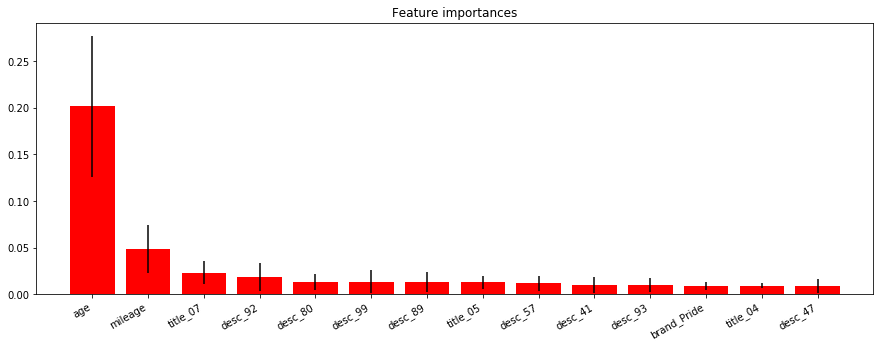

In [40]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_names = cars.drop(columns=['price_cat']).columns.values

# Plot the impurity-based feature importances of the forest
feature_count = int(X.shape[1]/10)
features = [feature_names[i] for i in indices][:feature_count]
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(feature_count), importances[indices][0:feature_count],
        color="r", yerr=std[indices][0:feature_count], align="center")
plt.xticks(range(feature_count), features, rotation=30, ha="right")
plt.xlim([-1, feature_count])
plt.show()

In [57]:
feature_names = cars.drop(columns=['price_cat']).columns.values
print ("Features sorted by their score:")
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), feature_names), reverse=True)

Features sorted by their score:


[(0.2878, 'age'),
 (0.063, 'mileage'),
 (0.0297, 'desc_92'),
 (0.0254, 'title_07'),
 (0.0203, 'desc_89'),
 (0.0164, 'desc_99'),
 (0.0141, 'desc_70'),
 (0.0134, 'title_05'),
 (0.0122, 'desc_57'),
 (0.012, 'desc_93'),
 (0.0115, 'brand_Pride'),
 (0.0099, 'desc_41'),
 (0.0093, 'desc_80'),
 (0.0093, 'desc_65'),
 (0.0084, 'desc_86'),
 (0.0084, 'desc_83'),
 (0.0081, 'brand_Peykan'),
 (0.008, 'desc_37'),
 (0.0078, 'title_04'),
 (0.0075, 'desc_09'),
 (0.0074, 'desc_58'),
 (0.0073, 'desc_82'),
 (0.0073, 'desc_42'),
 (0.0073, 'brand_RD/ROA'),
 (0.0072, 'title_00'),
 (0.007, 'brand_Peugeot Pars'),
 (0.0069, 'title_03'),
 (0.0067, 'title_02'),
 (0.0067, 'desc_77'),
 (0.0063, 'desc_54'),
 (0.0062, 'desc_12'),
 (0.0058, 'title_01'),
 (0.0057, 'desc_67'),
 (0.0053, 'desc_64'),
 (0.0053, 'desc_47'),
 (0.0052, 'desc_98'),
 (0.0052, 'desc_56'),
 (0.0051, 'title_06'),
 (0.005, 'desc_36'),
 (0.0049, 'title_08'),
 (0.0049, 'desc_50'),
 (0.0049, 'desc_33'),
 (0.0045, 'title_09'),
 (0.0044, 'desc_84'),
 (0.00

In [59]:
corr = cars.corr()
f, ax = plt.subplots(figsize=(30, 24))
sns.heatmap(corr, ax=ax, linewidths=0.1)